http://bit.ly/LinRegTF2 or
https://colab.research.google.com/drive/1X0oQP_CjlT_y_cvmxJSlRhRH0G33-ARZ

## Import the required Modules

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras as ks
from tensorflow.estimator import LinearRegressor
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

print(tf.__version__)

2.2.0


## Load and configure the Boston Housing Dataset

In [3]:
boston_load = datasets.load_boston()

feature_columns = boston_load.feature_names
target_column = boston_load.target

boston_data = pd.DataFrame(boston_load.data, columns=feature_columns).astype(np.float32)
boston_data['MEDV'] = target_column.astype(np.float32)

boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001


## Checking the relation between the variables using Pairplot and Correlation Graph

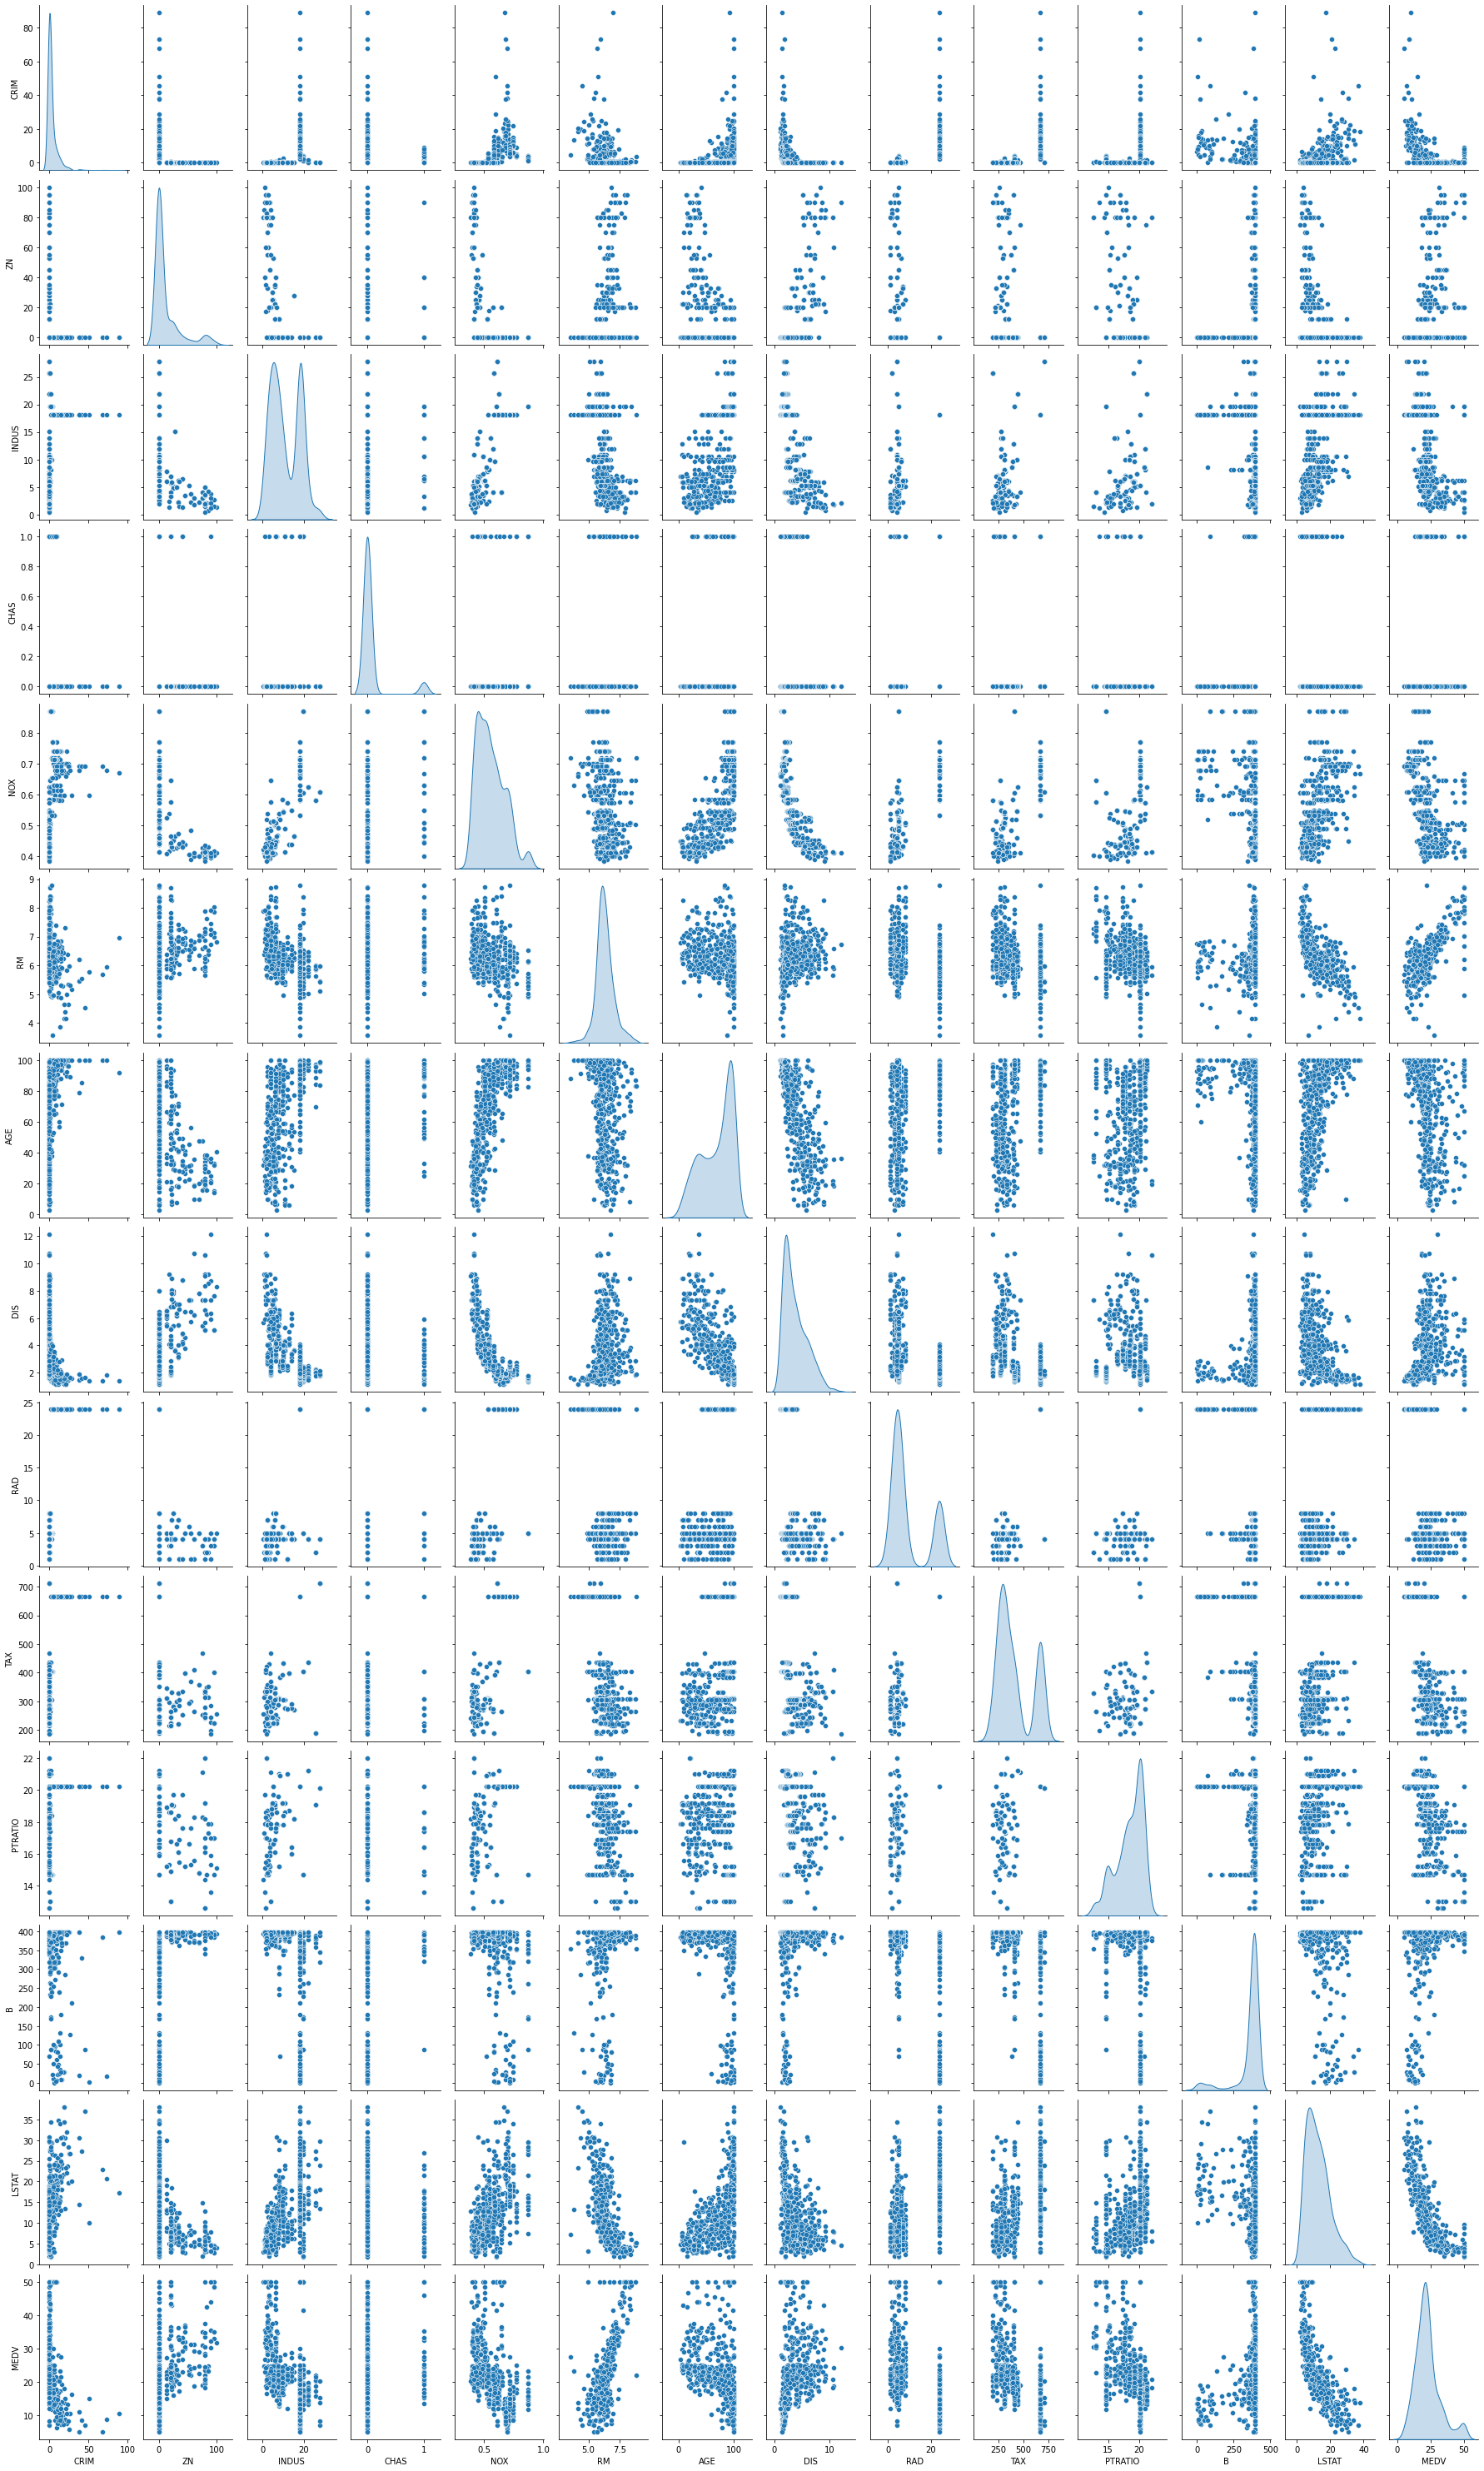

In [4]:
sb.pairplot(boston_data, diag_kind="kde", height=3, aspect=0.6)

In [5]:
correlation_data = boston_data.corr()
correlation_data.style.background_gradient(cmap='coolwarm', axis=None)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Descriptive Statistics - Central Tendency and Dispersion

In [6]:
stats = boston_data.describe()
boston_stats = stats.transpose()
boston_stats

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613523,8.601545,0.00632,0.082045,0.256510,3.677083,88.976196
ZN,506.0,11.363636,23.322390,0.00000,0.000000,0.000000,12.500000,100.000000
INDUS,506.0,11.136797,6.860355,0.46000,5.190000,9.690000,18.100000,27.740000
CHAS,506.0,0.069170,0.253993,0.00000,0.000000,0.000000,0.000000,1.000000
NOX,506.0,0.554696,0.115878,0.38500,0.449000,0.538000,0.624000,0.871000
RM,506.0,6.284636,0.702617,3.56100,5.885500,6.208500,6.623500,8.780000
AGE,506.0,68.574921,28.148869,2.90000,45.025000,77.500000,94.074999,100.000000
DIS,506.0,3.795043,2.105711,1.12960,2.100175,3.207450,5.188425,12.126500
RAD,506.0,9.549407,8.707269,1.00000,4.000000,5.000000,24.000000,24.000000
TAX,506.0,408.237152,168.537170,187.00000,279.000000,330.000000,666.000000,711.000000


## Select the required columns

In [7]:
X_data = boston_data[[i for i in boston_data.columns if i not in ['MEDV']]]
Y_data = boston_data[['MEDV']]

## Train Test Split

In [8]:
training_features , test_features ,training_labels, test_labels = train_test_split(X_data , Y_data , test_size=0.2)

In [9]:
print('No. of rows in Training Features: ', training_features.shape[0])
print('No. of rows in Test Features: ', test_features.shape[0])
print('No. of columns in Training Features: ', training_features.shape[1])
print('No. of columns in Test Features: ', test_features.shape[1])

print('No. of rows in Training Label: ', training_labels.shape[0])
print('No. of rows in Test Label: ', test_labels.shape[0])
print('No. of columns in Training Label: ', training_labels.shape[1])
print('No. of columns in Test Label: ', test_labels.shape[1])

No. of rows in Training Features:  404
No. of rows in Test Features:  102
No. of columns in Training Features:  13
No. of columns in Test Features:  13
No. of rows in Training Label:  404
No. of rows in Test Label:  102
No. of columns in Training Label:  1
No. of columns in Test Label:  1


In [10]:
stats = training_features.describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
CRIM,404.0,3.468226,7.931148,0.00632,0.082155,0.240075,3.594928,73.534103
ZN,404.0,11.457921,23.164066,0.00000,0.000000,0.000000,13.750000,100.000000
INDUS,404.0,11.195254,6.885445,0.46000,5.190000,8.560000,18.100000,27.740000
CHAS,404.0,0.071782,0.258446,0.00000,0.000000,0.000000,0.000000,1.000000
NOX,404.0,0.554984,0.117812,0.38900,0.448750,0.535000,0.625750,0.871000
RM,404.0,6.267330,0.707171,3.56100,5.878750,6.183500,6.616500,8.780000
AGE,404.0,68.968109,27.894032,2.90000,45.549999,77.500000,94.099998,100.000000
DIS,404.0,3.802717,2.131329,1.12960,2.100525,3.243900,5.141475,12.126500
RAD,404.0,9.410892,8.607186,1.00000,4.000000,5.000000,24.000000,24.000000
TAX,404.0,404.933167,167.139923,187.00000,279.750000,330.000000,666.000000,711.000000


In [11]:
stats = test_features.describe()
stats = stats.transpose()
stats

,count,mean,std,min,25%,50%,75%,max
CRIM,102.0,4.189017,10.886892,0.01311,0.072755,0.325745,4.251580,88.976196
ZN,102.0,10.990196,24.052446,0.00000,0.000000,0.000000,0.000000,95.000000
INDUS,102.0,10.905192,6.788699,1.21000,4.877500,9.900000,18.100000,27.740000
CHAS,102.0,0.058824,0.236456,0.00000,0.000000,0.000000,0.000000,1.000000
NOX,102.0,0.553547,0.108420,0.38500,0.458500,0.541000,0.624000,0.871000
RM,102.0,6.353176,0.683373,4.65200,5.929750,6.321500,6.732500,8.725000
AGE,102.0,67.017647,29.225348,6.60000,41.950001,77.849998,93.500002,100.000000
DIS,102.0,3.764650,2.010878,1.35670,2.093825,3.092200,5.126650,9.089200
RAD,102.0,10.098040,9.115877,1.00000,4.000000,5.000000,24.000000,24.000000
TAX,102.0,421.323517,174.186371,193.00000,277.000000,358.000000,666.000000,711.000000


## Normalize Data

In [12]:
def norm(x):
  stats = x.describe()
  stats = stats.transpose()
  return (x - stats['mean']) / stats['std']

normed_train_features = norm(training_features)
normed_test_features = norm(test_features)

## Build the Input Pipeline for TensorFlow model

In [13]:
def feed_input(features_dataframe, target_dataframe, num_of_epochs=10, shuffle=True, batch_size=32):
  def input_feed_function():
    dataset = tf.data.Dataset.from_tensor_slices((dict(features_dataframe), target_dataframe))
    if shuffle:
      dataset = dataset.shuffle(2000)
    dataset = dataset.batch(batch_size).repeat(num_of_epochs)
    return dataset
  return input_feed_function

train_feed_input = feed_input(normed_train_features, training_labels)
train_feed_input_testing = feed_input(normed_train_features, training_labels, num_of_epochs=1, shuffle=False)
test_feed_input = feed_input(normed_test_features, test_labels, num_of_epochs=1, shuffle=False)

## Model Training

In [14]:
feature_columns_numeric = [tf.feature_column.numeric_column(m) for m in training_features.columns]

In [15]:
linear_model = LinearRegressor(feature_columns=feature_columns_numeric, optimizer='RMSProp')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpgw0ngb0_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [16]:
linear_model.train(train_feed_input)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tenso

## Predictions

In [17]:
train_predictions = linear_model.predict(train_feed_input_testing)
test_predictions = linear_model.predict(test_feed_input)

In [18]:
train_predictions_series = pd.Series([p['predictions'][0] for p in train_predictions])
test_predictions_series = pd.Series([p['predictions'][0] for p in test_predictions])

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpgw0ngb0_/model.ckpt-130
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all 

In [19]:
train_predictions_df = pd.DataFrame(train_predictions_series, columns=['predictions'])
test_predictions_df = pd.DataFrame(test_predictions_series, columns=['predictions'])

In [20]:
training_labels.reset_index(drop=True, inplace=True)
train_predictions_df.reset_index(drop=True, inplace=True)

test_labels.reset_index(drop=True, inplace=True)
test_predictions_df.reset_index(drop=True, inplace=True)

In [21]:
train_labels_with_predictions_df = pd.concat([training_labels, train_predictions_df], axis=1)
test_labels_with_predictions_df = pd.concat([test_labels, test_predictions_df], axis=1)

## Validation

In [22]:
def calculate_errors_and_r2(y_true, y_pred):
  mean_squared_err = (mean_squared_error(y_true, y_pred))
  root_mean_squared_err = np.sqrt(mean_squared_err)
  r2 = round(r2_score(y_true, y_pred)*100,0)
  return mean_squared_err, root_mean_squared_err, r2



In [23]:
train_mean_squared_error, train_root_mean_squared_error, train_r2_score_percentage = calculate_errors_and_r2(training_labels, train_predictions_series)
test_mean_squared_error, test_root_mean_squared_error, test_r2_score_percentage = calculate_errors_and_r2(test_labels, test_predictions_series)

print('Training Data Mean Squared Error = ', train_mean_squared_error)
print('Training Data Root Mean Squared Error = ', train_root_mean_squared_error)
print('Training Data R2 = ', train_r2_score_percentage)

print('Test Data Mean Squared Error = ', test_mean_squared_error)
print('Test Data Root Mean Squared Error = ', test_root_mean_squared_error)
print('Test Data R2 = ', test_r2_score_percentage)

Training Data Mean Squared Error =  23.116983082479756
Training Data Root Mean Squared Error =  4.808012383769384
Training Data R2 =  71.0
Test Data Mean Squared Error =  22.417050689403226
Test Data Root Mean Squared Error =  4.734664791661943
Test Data R2 =  77.0


# Conclusion
Not much explanation in the book about what is going on 